In [1]:
# import tensorflow.compat.v1 as tf
# from tensorflow.compat.v1 import keras
from os import listdir
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imsave, imshow
import numpy as np
import pandas as pd
import math
from scipy.signal import convolve2d
import scipy.signal as ss
from scipy import ndimage
from skimage import img_as_ubyte, img_as_float
from skimage.transform import resize
# from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
# from keras import Sequential
# from keras import layers
import time
import copy
from skimage.color import rgb2gray
from sklearn.metrics import mean_squared_error as MSE
import gc
import os.path
from metrics import calc_metrics
import sys
from lib import make_directory
gc.enable()

In [38]:
# d_deconv = './MyStuff/results/dates/05_17/deconv/'
# d_deconv = './MyStuff/results/dates/05_14/deconv/as/'

dir_to_val = '/home/vados/Stuff/Images/val'
cur_l = 'l09_best_fpn_50'
last_l = 'l09_last_fpn_115'
base = 'base'
lst = os.listdir(dir_to_val)
result_base = dict()
result_l09_best  = dict()
result_l09_last  = dict()
base_len = 9
base_angle = 0

calc_len = True
# calc_len = False

# lst = [a for a in lst if 'l09' in a]
lst = [a for a in lst if 'a00' in a]

for idx in lst:
    last_l_dir = os.path.join(dir_to_val, idx, last_l)
    cur_l_dir = os.path.join(dir_to_val, idx, cur_l)
    base_dir = os.path.join(dir_to_val, idx, cur_l)
    orig_img_dir = os.path.join(dir_to_val, idx, 'sharp')
    metrics = []
    result_l09_last[int(idx[1:3]) - base_len] = calc_metrics(last_l_dir, orig_img_dir)
    result_base[int(idx[1:3]) - base_len] = calc_metrics(base_dir, orig_img_dir)
    # result_l09_best[int(idx[1:3]) - base_len] = calc_metrics(cur_l_dir, orig_img_dir)
    # result_l09_last[int(idx[4:6]) - base_angle] = calc_metrics(last_l_dir, orig_img_dir)
    # result_base[int(idx[4:6])     - base_angle] = calc_metrics(base_dir, orig_img_dir)
    # result_l09_best[int(idx[4:6]) - base_angle] = calc_metrics(cur_l_dir, orig_img_dir)
    # result_deconv[int(idx[-2:])] = calc_metrics(another_dir, orig_img_dir)
    # result_deconv[float(idx[2:])] = calc_metrics(another_dir, orig_img_dir)
    

In [36]:
nn_keys, nn_values # angle

([0, 10, 20, 30, 40],
 [{'PSNR': 24.412560328345794, 'SSIM': 0.8129392998043339},
  {'PSNR': 24.504042109242445, 'SSIM': 0.8198038378013716},
  {'PSNR': 23.707086214249564, 'SSIM': 0.8013157240118352},
  {'PSNR': 22.837392145489183, 'SSIM': 0.7750090861892603},
  {'PSNR': 21.62909009037877, 'SSIM': 0.7351919171253716}])

In [37]:
base_keys, base_values # angle

([0, 10, 20, 30, 40],
 [{'PSNR': 24.187949675158876, 'SSIM': 0.8094562573847407},
  {'PSNR': 23.920555961834875, 'SSIM': 0.8069945562619453},
  {'PSNR': 23.57218339440265, 'SSIM': 0.797798507636897},
  {'PSNR': 22.665537741933885, 'SSIM': 0.7647476410357958},
  {'PSNR': 21.831733683060328, 'SSIM': 0.737002727676261}])

In [41]:
nn_keys, nn_values # len

([-6, -4, -2, 0, 2, 4, 6],
 [{'PSNR': 26.63652510238866, 'SSIM': 0.908961594817835},
  {'PSNR': 26.192239633681975, 'SSIM': 0.8852529118298802},
  {'PSNR': 25.53824341500129, 'SSIM': 0.8516338381866349},
  {'PSNR': 24.23722987457367, 'SSIM': 0.8095306720033055},
  {'PSNR': 23.130345054470006, 'SSIM': 0.7758507017353444},
  {'PSNR': 22.597900794242314, 'SSIM': 0.7538139682159191},
  {'PSNR': 21.961406213840434, 'SSIM': 0.731439420133951}])

In [42]:
base_keys, base_values # len

([-6, -4, -2, 0, 2, 4, 6],
 [{'PSNR': 27.428716857798875, 'SSIM': 0.916879118846947},
  {'PSNR': 26.74463327848757, 'SSIM': 0.888341681557818},
  {'PSNR': 25.142392114500026, 'SSIM': 0.8418268160535302},
  {'PSNR': 23.887235150422065, 'SSIM': 0.8042866777148818},
  {'PSNR': 23.25835418871284, 'SSIM': 0.7796517867234688},
  {'PSNR': 22.422506476303994, 'SSIM': 0.750521797804523},
  {'PSNR': 22.00462948219816, 'SSIM': 0.7310452239879944}])

In [39]:
nn_keys = sorted(list(result_l09_last)) [: -1]
nn_values = [result_l09_last[key] for key in nn_keys]

In [12]:
nn_keys = sorted(list(result_l09_best))
nn_values = [result_l09_best[key] for key in nn_keys]

In [40]:
base_keys = sorted(list(result_base))[: -1]
base_values =   [result_base[key] for key in base_keys]

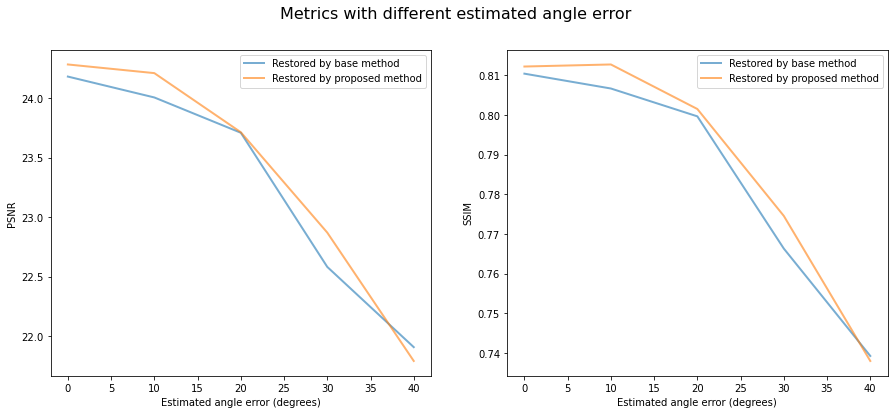

In [5]:
fig, [ax1, ax2]= plt.subplots(nrows=1, ncols=2, figsize=(15,6))
lines = []
metric = 'PSNR'
calc_len = True
# calc_len = False

line_base,  = ax1.plot([a for a in base_keys], [v[metric]   for v in base_values],  lw=2, alpha=0.6)
line_nn,  = ax1.plot([a for a in nn_keys],  [v[metric] for v in nn_values],    lw=2, alpha=0.6)

lines.append(line_base)
lines.append(line_nn)

# ax1.legend(lines, ['Восстановленные базовым методом', 'Восстановленные дообученной нейронной сетью'])
ax1.legend(lines, ['Restored by base method', 'Restored by proposed method'])

# fig.suptitle('Метрики при разной ошибке определения длины размытия', fontsize=16)
# fig.suptitle('Метрики при разной ошибке определения угла размытия', fontsize=16)
fig.suptitle('Metrics with different estimated angle error', fontsize=16)
ax1.set_ylabel(metric)
# ax1.set_xlabel('Ошибка в предполагаемой длине размытия (в пикселях)')
# ax1.set_xlabel('Уровень шума (значение отклонения)')

lines = []
metric = 'SSIM'

line_base,  = ax2.plot([a for a in base_keys], [v[metric] for v in base_values],  lw=2, alpha=0.6)
line_nn,    = ax2.plot([a for a in nn_keys],   [v[metric] for v in nn_values],    lw=2, alpha=0.6)

lines.append(line_base)
lines.append(line_nn)

# ax2.legend(lines, ['Восстановленные базовым методом', 'Восстановленные дообученной нейронной сетью'])
ax2.legend(lines, ['Restored by base method', 'Restored by proposed method'])

# ax1.set_xlabel('Ошибка в предполагаемом угле размытия (в градусах)')
# ax2.set_xlabel('Ошибка в предполагаемой длине размытия (в пикселях)')
ax1.set_xlabel('Estimated angle error (degrees)')
ax2.set_xlabel('Estimated angle error (degrees)')
# ax1.set_xlabel('Уровень шума (значение отклонения)')
ax2.set_ylabel(metric)

save_dir_plots = './temp/results/'
make_directory(save_dir_plots)
plt.savefig(os.path.join(os.path.join(save_dir_plots, 'len.png' )))
# plt.savefig(os.path.join(os.path.join(save_dir_plots, 'angle.png' )))
# plt.cla()